# **Data Process**

# import

In [ ]:
import os
import csv

def create_image_csv(directory_path, csv_filename):
    # Get all files in the directory
    files = os.listdir(directory_path)

    # Filter only image files
    image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Write image names to CSV file
    with open(csv_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Image Name'])
        for image_file in image_files:
            writer.writerow([image_file])

# Example usage:
directory_path =  "/Users/mskamran/Documents/Data Science/final letters process/Akshar Porichoy/Junk"
csv_filename = 'junk.csv'
create_image_csv(directory_path, csv_filename)
print(f"CSV file '{csv_filename}' created successfully with image names.")


In [ ]:
# prompt: load a csv file using pandas for data analysis

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/mskamran/Downloads/Akshay_porichoy_data.csv')

# Print the DataFrame
print(df)

                                               Image Name
0       Chattogram_Nakshangchori School Bandarban_C6_F...
1       Chattogram_Hazi Firuza Begom School Bandarban_...
2       Chattogram_Madinatul Model Madrasa Bandarban_C...
3       Chattogram_Baishari School Bandarban_C10_M_A15...
4       Chattogram_Madinatul Model Madrasa Bandarban_C...
...                                                   ...
353677  Dhaka_Shukhia Bazar Kishoregonj_C3_N_A8_P1_127...
353678  Dhaka_Shukhia Bazar Kishoregonj_C7_N_A13_P1_19...
353679  Dhaka_Zirabo Dawan Idrish College_C12_M_A18_P1...
353680  Chattogram_Baishari School Bandarban_C9_F_A15_...
353681  Dhaka_Johrul Aftab School Kishoregonj_C5_F_A10...

[353682 rows x 1 columns]


# Split in column

In [ ]:
# Splitting the 'Image Name' column based on '_' and '.'
df_split = df['Image Name'].str.split('_|\.', expand=True)

# Renaming the columns for clarity
df_split.columns = ['Division', 'School', 'Class', 'Gender', 'Age', 'Page1', 'Code2', 'Letters', 'Filename', 'Extension']

# Concatenating the split DataFrame with the original DataFrame
df = pd.concat([df, df_split], axis=1)

# Dropping the original 'Image Name' column if necessary
# df = df.drop(columns=['Image Name'])

# Displaying the resulting DataFrame
print(df)


                                               Image Name    Division  \
0       Chattogram_Nakshangchori School Bandarban_C6_F...  Chattogram   
1       Chattogram_Hazi Firuza Begom School Bandarban_...  Chattogram   
2       Chattogram_Madinatul Model Madrasa Bandarban_C...  Chattogram   
3       Chattogram_Baishari School Bandarban_C10_M_A15...  Chattogram   
4       Chattogram_Madinatul Model Madrasa Bandarban_C...  Chattogram   
...                                                   ...         ...   
353677  Dhaka_Shukhia Bazar Kishoregonj_C3_N_A8_P1_127...       Dhaka   
353678  Dhaka_Shukhia Bazar Kishoregonj_C7_N_A13_P1_19...       Dhaka   
353679  Dhaka_Zirabo Dawan Idrish College_C12_M_A18_P1...       Dhaka   
353680  Chattogram_Baishari School Bandarban_C9_F_A15_...  Chattogram   
353681  Dhaka_Johrul Aftab School Kishoregonj_C5_F_A10...       Dhaka   

                                    School Class Gender  Age Page1  Code2  \
0           Nakshangchori School Bandarban    

In [ ]:
# Set the maximum column width to display full contents
pd.set_option('display.max_colwidth', None)

# Display the first 100 rows of the DataFrame
print(df.head(10).to_string(index=False))

                                                            Image Name   Division                             School Class Gender Age Page1 Code2 Letters Filename Extension
    Chattogram_Nakshangchori School Bandarban_C6_F_A12_P1_3045_ক্ল.png Chattogram     Nakshangchori School Bandarban    C6      F A12    P1  3045     ক্ল      png      None
Chattogram_Hazi Firuza Begom School Bandarban_C8_F_A15_P1_5334_স্ট.png Chattogram Hazi Firuza Begom School Bandarban    C8      F A15    P1  5334     স্ট      png      None
   Chattogram_Madinatul Model Madrasa Bandarban_C9_F_A15_P1_5051_স.jpg Chattogram  Madinatul Model Madrasa Bandarban    C9      F A15    P1  5051       স      jpg      None
          Chattogram_Baishari School Bandarban_C10_M_A15_P1_5515_৩.png Chattogram          Baishari School Bandarban   C10      M A15    P1  5515       ৩      png      None
  Chattogram_Madinatul Model Madrasa Bandarban_C4_F_A11_P1_4406_্র.jpg Chattogram  Madinatul Model Madrasa Bandarban    C4      F A11  

# Delete Some Column

In [ ]:
df.drop(columns=['Image Name'], inplace=True)
df.drop(columns=['Code2'], inplace=True)
df.drop(columns=['Filename'], inplace=True)
df.drop(columns=['Extension'], inplace=True)

print(df.head(10).to_string(index=False))

  Division                             School Class Gender Age Page1 Letters
Chattogram     Nakshangchori School Bandarban    C6      F A12    P1     ক্ল
Chattogram Hazi Firuza Begom School Bandarban    C8      F A15    P1     স্ট
Chattogram  Madinatul Model Madrasa Bandarban    C9      F A15    P1       স
Chattogram          Baishari School Bandarban   C10      M A15    P1       ৩
Chattogram  Madinatul Model Madrasa Bandarban    C4      F A11    P1      ্র
  Rajshahi                     Mission School    C2      F  A9    P1      য়
Chattogram         Baishari Madrasa Bandarban    C7      F A12    P1     স্ত
     Dhaka          Shukhia Bazar Kishoregonj    C4      F A10    P1       ঊ
     Dhaka                            School     C2   Null  A9    P1      য়
     Dhaka    Johrul Aftab School Kishoregonj    C1      F  A5    P1       গ


# **Divisions**

Unique Divisions:
['Chattogram' 'Rajshahi' 'Dhaka' 'Khulna']

Division Counts:
Division
Dhaka         131601
Rajshahi      130944
Chattogram     89184
Khulna          1953
Name: count, dtype: int64


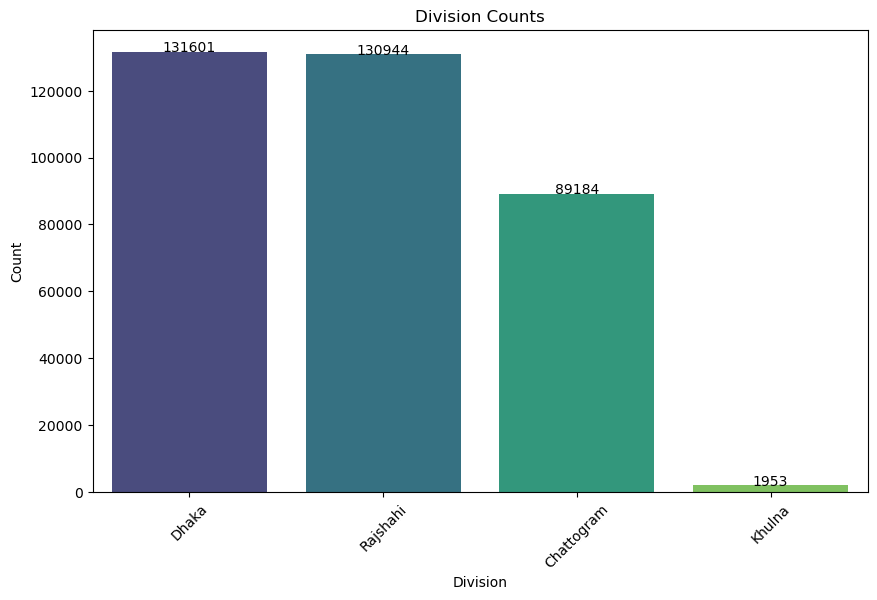

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

unique_divisions = df['Division'].unique()
division_counts = df['Division'].value_counts()

print("Unique Divisions:")
print(unique_divisions)

print("\nDivision Counts:")
print(division_counts)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=division_counts.index, y=division_counts.values, palette="viridis")
plt.xlabel('Division')
plt.ylabel('Count')
plt.title('Division Counts')
plt.xticks(rotation=45)

# Displaying values on top of the bars
for i, count in enumerate(division_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()


# **School**

Unique School:
['Nakshangchori School Bandarban' 'Hazi Firuza Begom School Bandarban'
 'Madinatul Model Madrasa Bandarban' 'Baishari School Bandarban'
 'Mission School' 'Baishari Madrasa Bandarban' 'Shukhia Bazar Kishoregonj'
 'School ' 'Johrul Aftab School Kishoregonj' 'Pakundia Pylot Kishoregonj'
 'Rajshashi Court Academy School RCAS' 'Ideal School'
 'Zirabo Dawan Idrish College' 'Badda School' 'Kajladi Private']

School Counts:
School
Mission School                         88032
Shukhia Bazar Kishoregonj              43908
Rajshashi Court Academy School RCAS    40032
Pakundia Pylot Kishoregonj             29376
Baishari School Bandarban              28896
Johrul Aftab School Kishoregonj        25152
Madinatul Model Madrasa Bandarban      23040
Nakshangchori School Bandarban         17664
School                                 12276
Baishari Madrasa Bandarban             12000
Zirabo Dawan Idrish College             9984
Badda School                            9696
Hazi Firuza Begom 

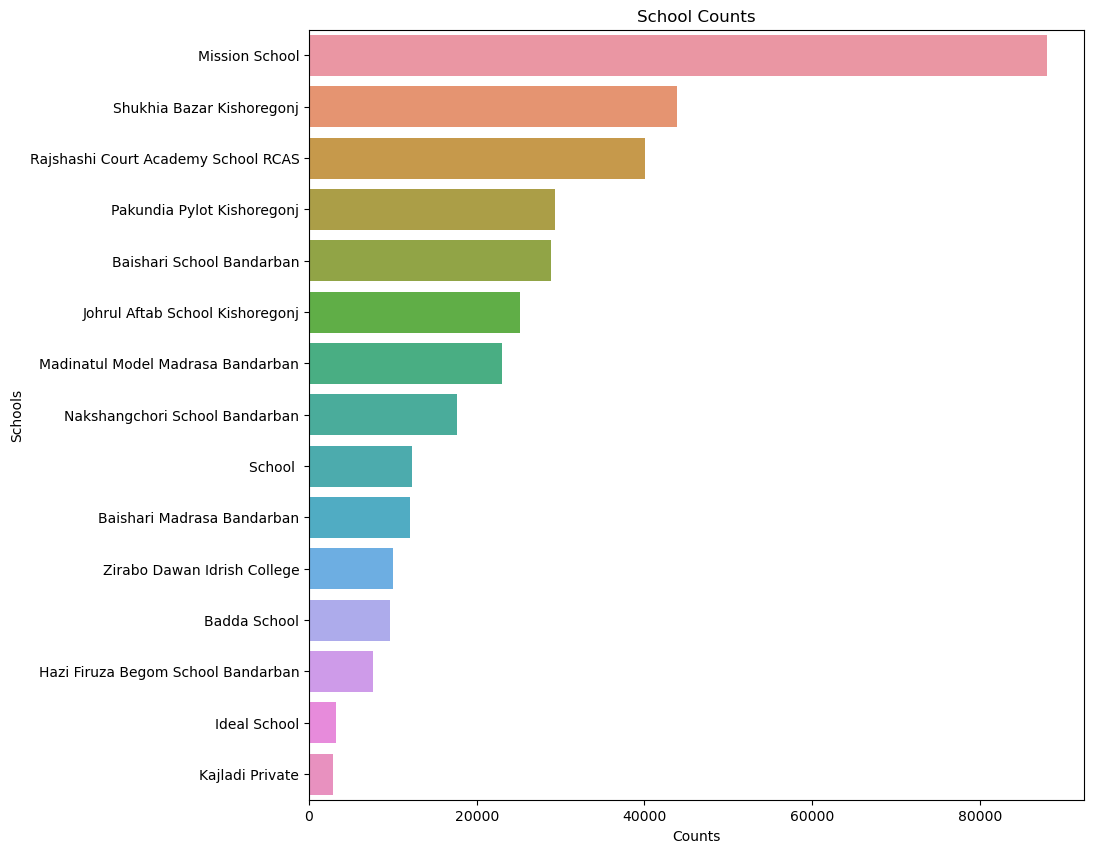

In [ ]:

import seaborn as sns

import matplotlib.pyplot as plt
# Get unique values and counts for the 'District' column
unique_School = df['School'].unique()
School_counts = df['School'].value_counts()

# Print the results
print("Unique School:")
print(unique_School)

print("\nSchool Counts:")
print(School_counts)




# Plotting the horizontal bar plot using seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x=School_counts.values, y=School_counts.index, orient='h')
plt.xlabel('Counts')
plt.ylabel('Schools')
plt.title('School Counts')

plt.show()

# **Category**

Unique Classes:
['C6' 'C8' 'C9' 'C10' 'C4' 'C2' 'C7' 'C1' 'C3' 'C5' 'C12' 'C11']

Class Counts:
Class
C8     59464
C6     54435
C7     51897
C9     36941
C1     25605
C10    25004
C4     24157
C3     22398
C5     20898
C2     18963
C11    10080
C12     3840
Name: count, dtype: int64


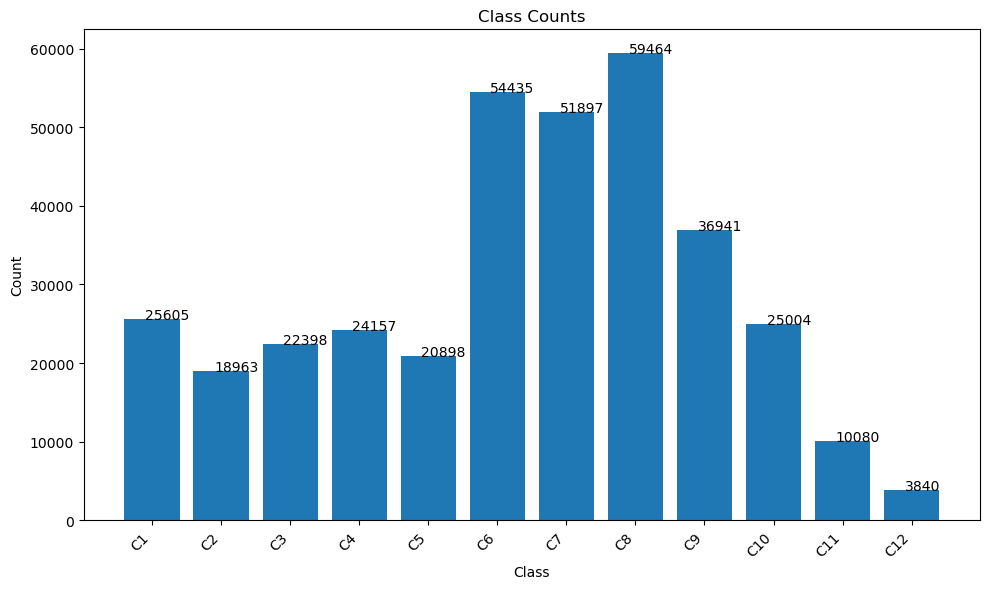

In [ ]:
import matplotlib.pyplot as plt

# Get unique values and counts for the 'Class' column
unique_classes = df['Class'].unique()
class_counts = df['Class'].value_counts()

# Print the results
print("Unique Classes:")
print(unique_classes)

print("\nClass Counts:")
print(class_counts)


# Define the custom order for classes
custom_order = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12']

# Get the counts for each class in the custom order
class_counts = df['Class'].value_counts().reindex(custom_order).fillna(0)

# Plotting histogram with values on bars
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_order, class_counts)

# Adding count values on top of each bar
for bar, count in zip(bars, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(int(count)), fontsize=10)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Gender**

Unique Genders:
['F' 'M' 'Null']

Gender Counts:
Gender
F       223662
M        95757
Null     34263
Name: count, dtype: int64


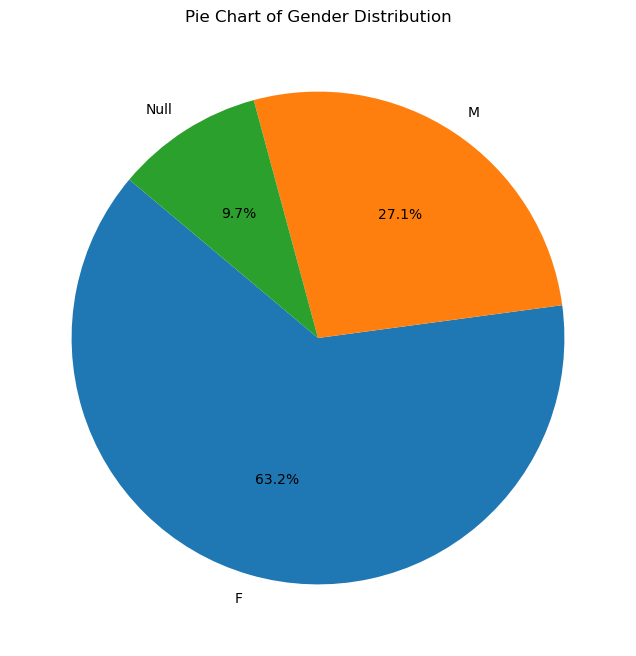

In [ ]:
import matplotlib.pyplot as plt

# Preprocess the 'Gender' column to replace 'Others' with 'Null'
df['Gender'] = df['Gender'].apply(lambda x: x if x in ['F', 'M'] else 'Null')

# Get unique values and counts for the 'Gender' column
unique_genders = df['Gender'].unique()
gender_counts = df['Gender'].value_counts()

# Print the results
print("Unique Genders:")
print(unique_genders)

print("\nGender Counts:")
print(gender_counts)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Gender Distribution')
plt.show()


# **AGE**

In [ ]:
# Get unique values and counts for the 'Age' column
unique_ages = df['Age'].unique()
age_counts = df['Age'].value_counts()

# Print the results
print("Unique Ages:")
print(unique_ages)

print("\nAge Counts:")
print(age_counts)


Unique Ages:
['A12' 'A15' 'A11' 'A9' 'A10' 'A5' 'A14' 'A13' 'A4' 'A7' 'A16' 'A8' 'C14'
 'A18' 'C15' 'A17' 'C12' 'A' 'A6' 'A19' 'C13' 'A21']

Age Counts:
Age
A13    57723
A12    52932
A14    45636
A15    33675
A11    29429
A10    23760
A9     22099
A8     18604
A16    14946
A7     13583
A17     8727
A18     7194
A4      6619
A5      5455
A6      3892
C14     3552
C13     1632
A19     1440
C15     1344
A        768
C12      576
A21       96
Name: count, dtype: int64


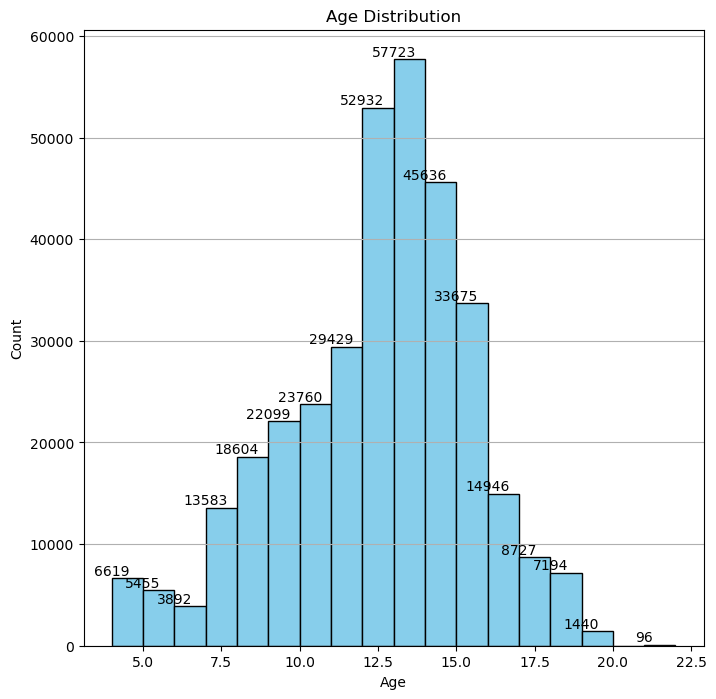

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess the 'Age' column to filter valid age values
df['Age'] = df['Age'].apply(lambda x: int(x[1:]) if (x.startswith('A') and x[1:].isdigit()) else None)

# Remove NULL values
df = df.dropna()

# Get unique values and counts for the 'Age' column
age_counts = df['Age'].value_counts().sort_index()

# Plotting the histogram
plt.figure(figsize=(8, 8))
plt.hist(df['Age'], bins=range(int(df['Age'].min()), int(df['Age'].max()) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Adding count values on top of bars
for i, count in enumerate(age_counts):
    plt.text(age_counts.index[i], count + 0.5, str(count), ha='center', va='bottom')

plt.grid(axis='y')
plt.show()


# **Letters**

In [ ]:
import pandas as pd

# Preprocess the 'Letters' column to filter valid values
df['Letters'] = df['Letters'].apply(lambda x: x if (not any(char.isdigit() for char in x) and 'jpg' not in x) else 'NULL')

# Get unique values and counts for the 'Letters' column
unique_letters = df['Letters'].unique()
letter_counts = df['Letters'].value_counts()

# Print the results
print("Unique Letters:")
print(unique_letters)

print("\nLetter Counts:")
print(letter_counts)


Unique Letters:
['ক্ল' 'স্ট' 'স' 'NULL' '্র' 'য়' 'স্ত' 'ঊ' 'গ' 'হ্ণ' 'চ' 'ক' 'খ' 'জ্জ'
 'ন্দ' 'শ' 'ঋ' 'ছ' 'ো' 'ঠ' 'ম্ন' 'ে' 'ি' 'ো' 'অ' 'ষ' 'ও' 'উ' 'ৈ' 'এ'
 'ক্ষ' 'ত্ম' 'চ্ছ' 'য' 'ট' 'ফ' 'ৌ' 'স্থ' 'ন' 'হ্ন' 'আ' 'ঢ়' 'র' 'ক্ত'
 'ঞ্জ' 'ঢ' 'ৎ' 'ব্ল' 'প' 'ভ' 'জ্ঞ' 'ম' 'দ্ধ' 'জ' 'ঈ' 'ণ্ট' 'শ্র' 'ন্ন' 'ঝ'
 'থ' 'ন্ড' 'দ্ব' 'ঙ' 'ড' 'ঔ' 'হ' 'ূ' 'ল' 'ঞ' 'দ' 'ী' '\u200d্য' 'ং' 'ঞ্চ'
 'ঃ' 'ৃ' 'ঁ' 'ন্ত' 'া' 'ড়' 'ু' 'ব' 'ঘ' 'চ্চ' 'ঐ' 'ধ' 'ত' 'ণ' 'ই' 'ৌ']

Letter Counts:
Letters
NULL    36289
স্ত      3862
ক্ল      3610
ব্ল      3610
ঁ        3610
        ...  
ত্ম      3192
জ্জ      3192
ো        483
চ্চ       418
ৌ        252
Name: count, Length: 90, dtype: int64


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the processed 'Letters' column

# Preprocess the 'Letters' column to filter valid values
df['Letters'] = df['Letters'].apply(lambda x: x if (not any(char.isdigit() for char in x) and 'jpg' not in x) else 'NULL')

# Get unique values and counts for the 'Letters' column
unique_letters = df['Letters'].unique()
letter_counts = df['Letters'].value_counts()

# Print the results
print("Unique Letters:")
print(unique_letters)

print("\nLetter Counts:")
print(letter_counts)

# Save the DataFrame to a CSV file
df.to_csv('LettersAnalyis.csv', index=False)

# Provide the download link
print("\nCSV file has been saved. Click the link below to download:")
print("[Download processed_data.csv](processed_data.csv)")


Unique Letters:
['ক্ল' 'স্ট' 'স' 'NULL' '্র' 'য়' 'স্ত' 'ঊ' 'গ' 'হ্ণ' 'চ' 'ক' 'খ' 'জ্জ'
 'ন্দ' 'শ' 'ঋ' 'ছ' 'ো' 'ঠ' 'ম্ন' 'ে' 'ি' 'ো' 'অ' 'ষ' 'ও' 'উ' 'ৈ' 'এ'
 'ক্ষ' 'ত্ম' 'চ্ছ' 'য' 'ট' 'ফ' 'ৌ' 'স্থ' 'ন' 'হ্ন' 'আ' 'ঢ়' 'র' 'ক্ত'
 'ঞ্জ' 'ঢ' 'ৎ' 'ব্ল' 'প' 'ভ' 'জ্ঞ' 'ম' 'দ্ধ' 'জ' 'ঈ' 'ণ্ট' 'শ্র' 'ন্ন' 'ঝ'
 'থ' 'ন্ড' 'দ্ব' 'ঙ' 'ড' 'ঔ' 'হ' 'ূ' 'ল' 'ঞ' 'দ' 'ী' '\u200d্য' 'ং' 'ঞ্চ'
 'ঃ' 'ৃ' 'ঁ' 'ন্ত' 'া' 'ড়' 'ু' 'ব' 'ঘ' 'চ্চ' 'ঐ' 'ধ' 'ত' 'ণ' 'ই' 'ৌ']

Letter Counts:
Letters
NULL    36289
স্ত      3862
ক্ল      3610
ব্ল      3610
ঁ        3610
        ...  
ত্ম      3192
জ্জ      3192
ো        483
চ্চ       418
ৌ        252
Name: count, Length: 90, dtype: int64

CSV file has been saved. Click the link below to download:
[Download processed_data.csv](processed_data.csv)


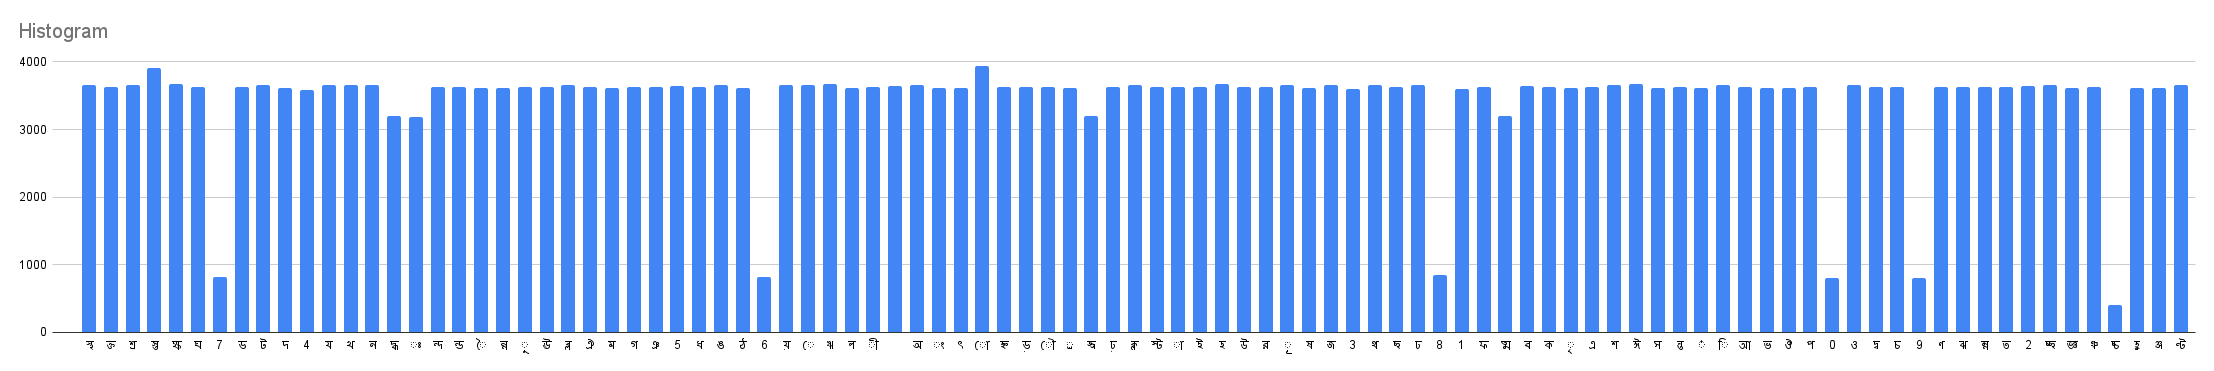

In [ ]:
# prompt: import a image

from IPython.display import Image
Image(filename='/Users/mskamran/Downloads/Letters Bar Chart.png')


# Analysis

In [ ]:


import pandas as pd

# Assuming you have a dataset named 'data.csv' in the same directory
# You can read the data into a pandas DataFrame
data = pd.read_csv('/Users/mskamran/Downloads/output.csv')

# Assuming you want to analyze a specific column named 'column_name'
column_name = 'Division'

# Display the full column
print("Full column:")
print(data[column_name])

# Summary statistics of the column
print("\nSummary statistics of the column:")
print(data[column_name].describe())

# Check for missing values in the column
print("\nMissing values in the column:")
print(data[column_name].isnull().sum())

# You can perform other analyses on this column as per your requirements



Full column:
0            Dhaka
1            Dhaka
2         Rajshahi
3           Khulna
4         Barishal
            ...   
361161       Dhaka
361162    Barishal
361163    Rajshahi
361164      Khulna
361165    Barishal
Name: Division, Length: 361166, dtype: object

Summary statistics of the column:
count     361166
unique         9
top        Dhaka
freq      151862
Name: Division, dtype: object

Missing values in the column:
0


# **CSV Convert**

In [ ]:
# prompt: convert this in to a CSV file

df.to_csv('Akshar_Porichoy_All_Letters_Split.csv', index=False)


In [ ]:
!cp Akshar_Porichoy_All_Letters_Split.csv /Users/mskamran/Downloads